# Problem Statement
Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled [dataset of sentiment labelled sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) for us to use. This dataset was created for the paper [From Group to Individual Labels using Deep Features](http://mdenil.com/media/papers/2015-deep-multi-instance-learning.pdf), Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.
### Outline
1. First Model: imdb
2. Transfer Model: yelp
3. Write-up

### 1. First Model: imdb

In [1]:
# prepare the environment
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = "data/imdb_labelled.txt"
reviews_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
reviews_raw.columns = ['review', 'positive']

In [3]:
keywords = ['superb', 'amazing', 'interesting', 'good', 'great', 'best', 'love', 'perfect', 'masterpiece', 'beautiful', 'excellent', 'wonderful', 'art', 'like', 'liked', 'enjoy', 'enjoyed']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    reviews_raw[str(key)] = reviews_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

Ideally, Naive Bayes will be used when our features are completely independent. However, realistically, there will be some independence. Here there is a moderate correlation between 'masterpiece'/'perfect' and 'enjoy'/'beautiful'. If this decreases our performance than we could remove one of the features.


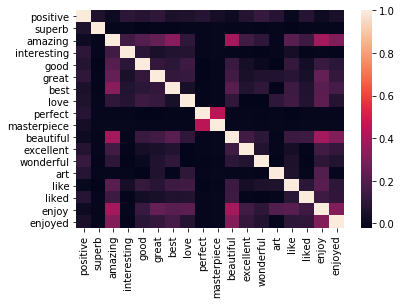

In [4]:
sns.heatmap(reviews_raw.corr())
# discussion
print ("Ideally, Naive Bayes will be used when our features are completely independent. However, realistically, there will be some independence. Here there is a moderate correlation between 'masterpiece'/'perfect' and 'enjoy'/'beautiful'. If this decreases our performance than we could remove one of the features.")

In [5]:
# create our data and target sets
data = reviews_raw[keywords]
target = reviews_raw['positive']

In [6]:
# Code snippet from Thinkful 2.2.6
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
total_points = data.shape[0]
mislabeled_points = (target != y_pred).sum()
print("Number of mislabeled points out of a total {} points : {}".format(
    total_points,
    mislabeled_points
))
# discussion
print ("Our Naive Bayes classifier only predicts the correct outcome {}% of the time. This is not a very good classifier as is. Consider adding keywords to our feature list.".format(round((1 - mislabeled_points / total_points) * 100.0, 1)))

Number of mislabeled points out of a total 748 points : 286
Our Naive Bayes classifier only predicts the correct outcome 61.8% of the time. This is not a very good classifier as is. Consider adding keywords to our feature list.


### 2. Transfer Model: yelp

In [7]:
# get the yelp data
yelp_path = 'data/yelp_labelled.txt'
yelp_reviews_raw = pd.read_csv(yelp_path, delimiter= '\t', header=None)
yelp_reviews_raw.columns = ['review', 'positive']

# add the same keyword features as imdb set
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_reviews_raw[str(key)] = yelp_reviews_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

# set up data and target sets
yelp_data = yelp_reviews_raw[keywords]
yelp_target = yelp_reviews_raw['positive']

In [8]:
# Instantiate our model and store it in a new variable.
yelp_bnb = BernoulliNB()

# Fit our model to the data.
yelp_bnb.fit(yelp_data, yelp_target)

yelp_pred = yelp_bnb.predict(yelp_data)

In [9]:
# display results
yelp_total_points = yelp_data.shape[0]
yelp_mislabeled_points = (yelp_target != yelp_pred).sum()
print("Number of mislabeled points out of a total {} points : {}".format(
    yelp_total_points,
    yelp_mislabeled_points
))
# discussion
print ("The transfered model predicts the correct outcome {}% of the time. This shows that reviews for different topics may be classified by similar keywords.".format(round((1 - yelp_mislabeled_points / yelp_total_points)*100.0, 1)))

Number of mislabeled points out of a total 1000 points : 386
The transfered model predicts the correct outcome 61.4% of the time. This shows that reviews for different topics may be classified by similar keywords.


### 3. Write-up
Our Naive Bayes classifier achieved 61.6% average accuracy for classifying sentiment across two separate datasets. First, the model was trained on the imdb data, using keywords to tune the accuracy. Then, the same keywords were used as features for the yelp data. The imdb predictor achieved 61.8% accuracy while the yelp predictor achieved 61.4% accuracy. The slightly higher imdb predictor score may be due to tuning the keywords for that data. Honestly, I am surprised that the scores are so similar. It seems like the sentiment of a review left on most topics will be accurately classified if trained on a single dataset.